In [ ]:
import pandas as pd
df = pd.read_csv("dane6.csv")

In [ ]:
#Zadanie 1.1
mapa_dni = {
    'Mon': 'Poniedziałek',
    'Tue': 'Wtorek',
    'Wed': 'Środa',
    'Thu': 'Czwartek',
    'Fri': 'Piątek',
    'Sat': 'Sobota',
    'Sun': 'Niedziela'
}
df['created_at_polskie'] = df['created_at'].str.replace(r'\b(?:Mon|Tue|Wed|Thu|Fri|Sat|Sun)\b', lambda x: mapa_dni[x.group()], regex=True)
print(df["created_at_polskie"])

0       Czwartek Aug 05 13:43:09 +0000 2021
1       Czwartek Aug 05 12:12:01 +0000 2021
2       Czwartek Aug 05 13:51:38 +0000 2021
3       Czwartek Aug 05 16:27:30 +0000 2021
4       Czwartek Aug 05 11:21:15 +0000 2021
                       ...                 
1391       Środa Jul 28 18:07:34 +0000 2021
1392       Środa Jul 28 20:51:14 +0000 2021
1393       Środa Jul 28 18:17:04 +0000 2021
1394       Środa Jul 28 19:41:36 +0000 2021
1395       Środa Jul 28 17:29:33 +0000 2021
Name: created_at_polskie, Length: 1396, dtype: object


In [ ]:
# Zadanie 1.2
mapa_miesiecy = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}
df['created_at_polskie'] = df['created_at_polskie'].str.replace(r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\b', lambda x: mapa_miesiecy[x.group()], regex=True)

print(df["created_at_polskie"])

0       Czwartek 08 05 13:43:09 +0000 2021
1       Czwartek 08 05 12:12:01 +0000 2021
2       Czwartek 08 05 13:51:38 +0000 2021
3       Czwartek 08 05 16:27:30 +0000 2021
4       Czwartek 08 05 11:21:15 +0000 2021
                       ...                
1391       Środa 07 28 18:07:34 +0000 2021
1392       Środa 07 28 20:51:14 +0000 2021
1393       Środa 07 28 18:17:04 +0000 2021
1394       Środa 07 28 19:41:36 +0000 2021
1395       Środa 07 28 17:29:33 +0000 2021
Name: created_at_polskie, Length: 1396, dtype: object


In [ ]:
# Zadanie 1.3
tweet_urls_list = df['tweet_url'].to_list()
print(tweet_urls_list[:3])# tylko 3 pierwsze
#bo jest ich aż...
print(len(tweet_urls_list))

['https://twitter.com/roboter15/status/1423278406167187458', 'https://twitter.com/west_wiki/status/1423255469389406209', 'https://twitter.com/KKazmierczakK/status/1423280539981602821']
1396


In [ ]:
# Zadanie 1.4
urls = df['urls'].dropna().tolist()
print(urls[:3])# tylko 3 pierwsze
#bo jest ich aż...
print(len(urls))

['https://ift.tt/3fxx9kq', 'https://twitter.com/TomaszGolonko/status/1423199797364903945', 'https://help.twitch.tv/s/article/local-sub-price-countries?language=en_US#latam']
354


In [ ]:
# Zadanie 1.5
media = df['media'].dropna().tolist()
print(media[:3])# tylko 3 pierwsze
#bo jest ich aż...
print(len(media))

['https://twitter.com/00Linde/status/1423313203975659522/photo/1', 'https://twitter.com/VKouprich/status/1423211101500624900/photo/1', 'https://twitter.com/TOMASZBURZYNSKI/status/1423196284454936577/photo/1']
81


In [ ]:
# Zadanie 1.6
!pip install stop-words
from stop_words import get_stop_words
stop_words = get_stop_words('polish')

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
print(df['text'][0])
print("-------------------")
print(df['text_without_stopwords'][0])

@tomo9000p @SilverMarketFan @ESPI_Operator @sylkarp @averageguy62 Rozmawialem ostatnio z kierowca robiacym w  kurierce miedzy hubami. Ukraina potrafila przyjsc z kupionym prawkiem c+e.
-------------------
@tomo9000p @SilverMarketFan @ESPI_Operator @sylkarp @averageguy62 Rozmawialem ostatnio z kierowca robiacym w kurierce miedzy hubami. Ukraina potrafila przyjsc z kupionym prawkiem c+e.


In [ ]:
# Zadanie 2.1
top5_tweets = df.sort_values(by='favorite_count', ascending=False).head(5)
print(top5_tweets.loc[:, ['favorite_count', 'text']])

      favorite_count                                               text
160              705  A więc jeśli się nie zaszczepimy, to wszyscy u...
137              383  Wielki sukces polskiego sportu: p.Jan-Krzyszto...
316              291  A mnie ciekawi @Straz_Graniczna jak można niel...
954              290  @kroplewina Ukraina robisz to dobrze. Zajebist...
1296             201  Niemcy najpierw wrzuciły Białoruś w ręce Putin...


In [ ]:
# Zadanie 2.2
top5_retweets  = df.sort_values(by='retweet_count', ascending=False).head(5)
print(top5_retweets.loc[:, ['retweet_count', 'text']])

     retweet_count                                               text
124            129  A więc jeśli się nie zaszczepimy, to wszyscy u...
59             129  A więc jeśli się nie zaszczepimy, to wszyscy u...
70             129  A więc jeśli się nie zaszczepimy, to wszyscy u...
69             129  A więc jeśli się nie zaszczepimy, to wszyscy u...
68             129  A więc jeśli się nie zaszczepimy, to wszyscy u...


In [ ]:
# Zadanie 2.3
tweets_non_sensitive = df[df['possibly_sensitive'] != True]
print(tweets_non_sensitive.loc[:, ['possibly_sensitive', 'text']])

     possibly_sensitive                                               text
0                   NaN  @tomo9000p @SilverMarketFan @ESPI_Operator @sy...
1                   NaN  A więc jeśli się nie zaszczepimy, to wszyscy u...
2                   NaN  @lukasz_nd To są spekulacje wbrew faktom. Bo ź...
3                   NaN  A więc jeśli się nie zaszczepimy, to wszyscy u...
4                   NaN  A więc jeśli się nie zaszczepimy, to wszyscy u...
...                 ...                                                ...
1391                NaN  🙏👉🤲Pamięć #Polaków, #Ukraińców i #Czechów, któ...
1392              False  Ukraina chce konsultacji w sprawie Nord Stream...
1393                NaN  Kompozytor Krzesimir Dębski o zakłamaniu na Uk...
1394                NaN  #PilnujmyPolski | @Macierewicz_A: Moskwa jest ...
1395              False  „Ukraina nie zaprzestanie walki z paktem ws #N...

[1392 rows x 2 columns]


In [ ]:
# Zadanie 2.4
earliest_user_created_at = df['user_created_at'].min()
earliest_user_tweets = df[df['user_created_at'] == earliest_user_created_at]
print(earliest_user_tweets.loc[:, ['user_created_at', 'text']])

                    user_created_at  \
183  Fri Apr 02 12:05:18 +0000 2021   

                                                  text  
183  A mnie ciekawi @Straz_Graniczna jak można niel...  


In [ ]:
# Zadanie 2.5
user_with_most_followers = df.loc[df['user_followers_count'].idxmax()]["user_id"]
tweets_of_user_with_most_followers = df[df['user_id'] == user_with_most_followers]
print(tweets_of_user_with_most_followers.loc[:, ['user_followers_count','user_screen_name', 'text']])

      user_followers_count user_screen_name  \
482                1913279            tvn24   
717                1913279            tvn24   
1189               1913279            tvn24   

                                                   text  
482   Ukraińska policja bada przyczyny śmierci biało...  
717   #PILNE | W parku w Kijowie znaleziono ciało bi...  
1189  Nowe ustalenia śledczych po katastrofie na zac...  


In [ ]:
# Zadanie 2.6
verified_tweets = df[df['user_verified'] == True]
verified_users = verified_tweets['user_screen_name'].to_list()
print(verified_users[:3])# tylko 3 pierwsze
#bo jest ich aż...
print(len(verified_users))

['UkrinformP', 'JkmMikke', 'forsalpl']
50


In [ ]:
# Zadanie 2.7
wystapienia = df['created_at'].str[:3].map(mapa_dni).value_counts()
wystapienia_slownik = wystapienia.to_dict()
print(wystapienia_slownik)

{'Czwartek': 376, 'Środa': 302, 'Wtorek': 288, 'Piątek': 136, 'Sobota': 114, 'Poniedziałek': 92, 'Niedziela': 88}


In [ ]:
# Zadanie 3 - przygotowanie metody i modelu
!pip install spacy
!python -m spacy download pl_core_news_sm
import spacy
nlp = spacy.load("pl_core_news_sm")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 38.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [ ]:
# Zadanie 3.1
def detect_pers_names(text):
    doc = nlp(text)
    pers_names = []
    for ent in doc.ents:
        if ent.label_ == "persName":
            pers_names.append(ent.text)
    return pers_names

df['persons'] = df['text'].apply(detect_pers_names)
print(df[df['persons'].apply(len) > 0]['persons'])

5                                                [hahaha]
13                                         [@Jan34733995]
17                [Waszczykowski, Kaczyński, @lkwarzecha]
36                                  [@lkwarzecha Jaaasne]
49      [Jan, Krzysztof Duda, Magnusa Carsena, Sergius...
                              ...                        
1366                                   [Krzesimir Dębski]
1367                                   [Krzesimir Dębski]
1368                                      [J., Kaczyński]
1369                                   [Krzesimir Dębski]
1393                                   [Krzesimir Dębski]
Name: persons, Length: 570, dtype: object


In [ ]:
# Zadanie 3.2
def detect_place_names(text):
    doc = nlp(text)
    place_names = []
    for ent in doc.ents:
        if ent.label_ == "placeName":
            place_names.append(ent.text)
    return place_names

df['organizations'] = df['text'].apply(detect_place_names)
print(df[df['organizations'].apply(len) > 0]['organizations'])

1                    [Bośnia, Ukraina, Egipt, Afganistan]
2                                      [Ukrainy, Ukraina]
3                    [Bośnia, Ukraina, Egipt, Afganistan]
4                    [Bośnia, Ukraina, Egipt, Afganistan]
6                    [Bośnia, Ukraina, Egipt, Afganistan]
                              ...                        
1388                                           [Ukrainie]
1389    [Polaków, Ukraińców, Czechów, niemieckich, Żydów]
1391    [Polaków, Ukraińców, Czechów, niemieckich, Żydów]
1392                                       [Nord, Polski]
1393                                           [Ukrainie]
Name: organizations, Length: 1163, dtype: object


In [ ]:
# Zadanie 3.3
def detect_org_names(text):
    doc = nlp(text)
    org_names = []
    for ent in doc.ents:
        if ent.label_ == "orgName":
            org_names.append(ent.text)
    return org_names

df['places'] = df['text'].apply(detect_org_names)
print(df[df['places'].apply(len) > 0]['places'])

0       [@SilverMarketFan @ESPI_Operator @sylkarp, Ukr...
1                                         [Syria &gt;0,1]
2                                    [Waszyngton, Moskwa]
3                                         [Syria &gt;0,1]
4                                         [Syria &gt;0,1]
                              ...                        
1391                                            [Ukraina]
1392                                            [Ukraina]
1393      [Kresy, OUN, Ukraina, SSGalizien, cerkiew \n\n]
1394               [Moskwa, Ukraina, europejskie, Moskwa]
1395                                            [Ukraina]
Name: places, Length: 940, dtype: object


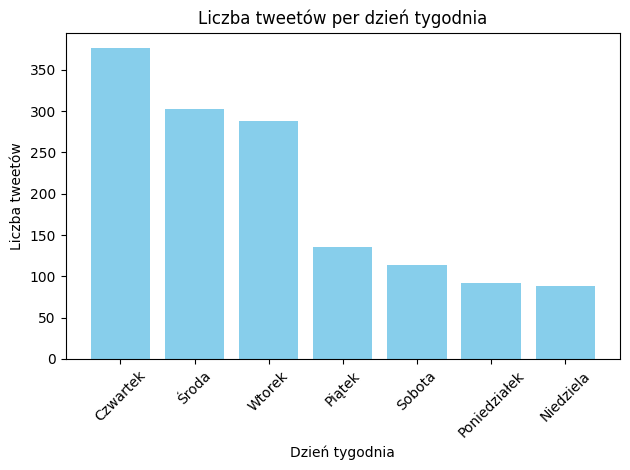

In [ ]:
# Zadanie 4.1
import matplotlib.pyplot as plt
dni_tygodnia = list(wystapienia_slownik.keys())
liczba_tweetow = list(wystapienia_slownik.values())

plt.bar(dni_tygodnia, liczba_tweetow, color='skyblue')
plt.title('Liczba tweetów per dzień tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()